In [1]:
from model import NeuralNetwork
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
from persistable_model import PresistableModel


# MNIST Datasetin lataaminen

Useiden eri mnist datasettien jälkeen päädyin tähän pikkelöityyn versioon https://www.kaggle.com/datasets/pablotab/mnistpklgz.

Datasetti pitää sisällään 50 000 opetuskuvaa ja vastausta, sekä 10 000 validaatiotestiin ja toiset 10 000 testaamiseen.

In [2]:
from utilities import vectorize_label

with gzip.open('../data/mnist.pkl.gz', 'rb') as f:
    train_set, val_set, test_set = pickle.load(f, encoding='latin1')

X_train = [np.reshape(x, (784, 1)) for x in train_set[0]]
y_train = [vectorize_label(y) for y in train_set[1]]
X_val = [np.reshape(x, (784, 1)) for x in val_set[0]]
y_val = val_set[1]
X_test = [np.reshape(x, (784, 1)) for x in test_set[0]]
y_test = test_set[1]

# Apufunktiot

Jotta tämän Notebookin lukeminen ja käyttäminen olisi mielekästä, määritellään alla olevaan koodiosioon apufunktioita. Niemäminen toivottavasti on sen verran selkeää, että saat idean mitä tapahtuu lukematta koodia.

In [3]:
def evalulate_model(m):
    results = []
    for x, y in zip(X_test, y_test):
        prediction, _, __ = m.predict(x)
        results.append(prediction == y)
    
    correct_predictions_count = np.array(results).sum()
    accuracy =  correct_predictions_count / len(results)
    
    print("Predicted {}/{} correct".format(correct_predictions_count, len(results)))
    print("Accuracy: {}".format(accuracy))
    
def plot_result(activation_function, evaluations):
    x = np.arange(-5, 5.1, 0.1)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    axes[0].plot(range(len(evaluations)), evaluations)
    axes[0].set_title("Epochs")

    axes[1].plot(x, activation_function.activation(x))
    axes[1].set_title("Activation function")

    plt.show()

# Sigmoid

Sigmoid on hyvä baselien aktivointi funktio. Sigmoid oli muodissa varsinkin 10 vuotta sitten, mutta ns. Vanishing Gradient Problem eli vapaasto suomennettuna häviävän grandientti ongelman vuoksi ReLU aktivointifunktio on nykyään suositumpi. Ongelma johtuu siitä, että suurilla ja pienillä arvoilla derivaatat ovat todella pieniä.  Saman ongelma on myös Tanh funktiolla jota testataan alempana.

Aktivointifunktioiden kuvaajia voit tarkastella [activation_functions.ipynb](activation_functions.ipynb) notebookissa.

Kokeillaan Neuroverkkoa kolmella eri kerros konfiguraatiolla. Kaikissa input kerros on 784 johtuen kuva vektorin koostaa (28*28) ja output kerros 10, koska numeroita on 0-9.

Kerros konfiguraatiot olkoon siis
784 30 16 10
784 30 10
784 100 10

Hyperparametrit olen valinnut epoch 30, learning rate 2.0 ja batch size 10. Useiden testien jälkeen olen näillä saanut Sigmoidilla parhaat tulokset

Epoch 0 done -> Predicted 9231/10000
Epoch 1 done -> Predicted 9432/10000
Epoch 2 done -> Predicted 9488/10000
Epoch 3 done -> Predicted 9510/10000
Epoch 4 done -> Predicted 9535/10000
Epoch 5 done -> Predicted 9506/10000
Epoch 6 done -> Predicted 9567/10000
Epoch 7 done -> Predicted 9581/10000
Epoch 8 done -> Predicted 9542/10000
Epoch 9 done -> Predicted 9564/10000
Epoch 10 done -> Predicted 9576/10000
Epoch 11 done -> Predicted 9558/10000
Epoch 12 done -> Predicted 9561/10000
Epoch 13 done -> Predicted 9506/10000
Epoch 14 done -> Predicted 9569/10000
Epoch 15 done -> Predicted 9601/10000
Epoch 16 done -> Predicted 9577/10000
Epoch 17 done -> Predicted 9609/10000
Epoch 18 done -> Predicted 9594/10000
Epoch 19 done -> Predicted 9593/10000
Epoch 20 done -> Predicted 9594/10000
Epoch 21 done -> Predicted 9530/10000
Epoch 22 done -> Predicted 9596/10000
Epoch 23 done -> Predicted 9585/10000
Epoch 24 done -> Predicted 9597/10000
Epoch 25 done -> Predicted 9574/10000
Epoch 26 done -> Predi

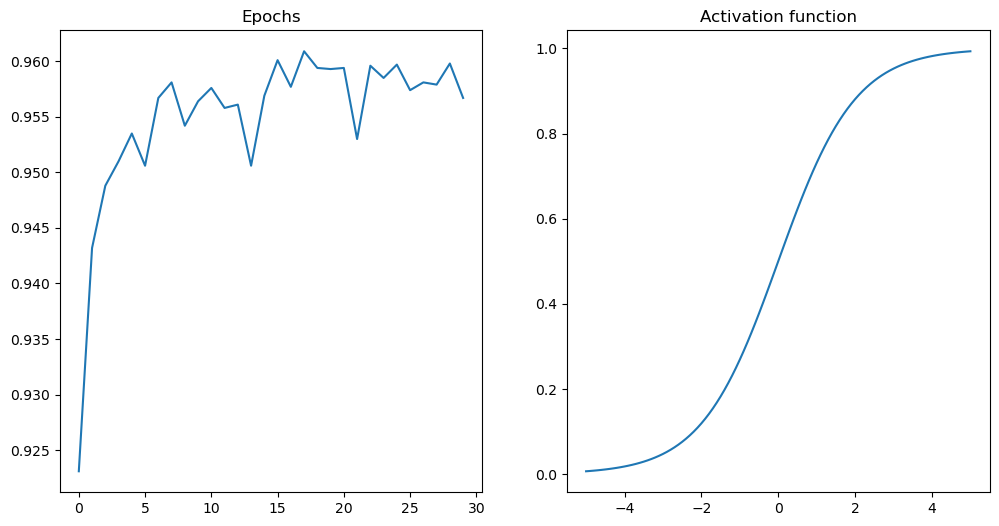

Predicted 9543/10000 correct
Accuracy: 0.9543


In [4]:
from activation_funtions import Sigmoid

activation_function = Sigmoid()
model = NeuralNetwork([784, 30, 16, 10], activation_function=activation_function)
evaluations = model.fit(X_train, y_train, X_val, y_val, 30, 2.0, 10)
plot_result(activation_function, evaluations)

# PresistableModel(model).save('baseline-784-30-16-10')
# Treenaaminen on hidasta > pikkelöidään neuroverkon datan ja luodaan uudelleen.
# model = PresistableModel.load('baseline')

evalulate_model(model)

Epoch 0 done -> Predicted 9417/10000
Epoch 1 done -> Predicted 9475/10000
Epoch 2 done -> Predicted 9512/10000
Epoch 3 done -> Predicted 9531/10000
Epoch 4 done -> Predicted 9540/10000
Epoch 5 done -> Predicted 9553/10000
Epoch 6 done -> Predicted 9575/10000
Epoch 7 done -> Predicted 9593/10000
Epoch 8 done -> Predicted 9601/10000
Epoch 9 done -> Predicted 9577/10000
Epoch 10 done -> Predicted 9606/10000
Epoch 11 done -> Predicted 9576/10000
Epoch 12 done -> Predicted 9556/10000
Epoch 13 done -> Predicted 9549/10000
Epoch 14 done -> Predicted 9608/10000
Epoch 15 done -> Predicted 9602/10000
Epoch 16 done -> Predicted 9588/10000
Epoch 17 done -> Predicted 9609/10000
Epoch 18 done -> Predicted 9595/10000
Epoch 19 done -> Predicted 9594/10000
Epoch 20 done -> Predicted 9596/10000
Epoch 21 done -> Predicted 9603/10000
Epoch 22 done -> Predicted 9597/10000
Epoch 23 done -> Predicted 9594/10000
Epoch 24 done -> Predicted 9598/10000
Epoch 25 done -> Predicted 9590/10000
Epoch 26 done -> Predi

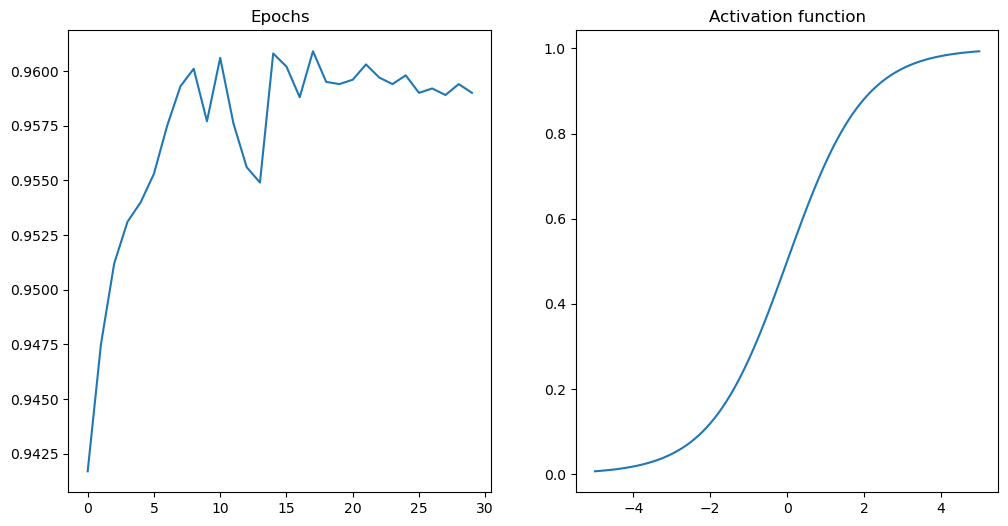

Predicted 9580/10000 correct
Accuracy: 0.958


In [5]:
from activation_funtions import Sigmoid

activation_function = Sigmoid()
model = NeuralNetwork([784, 30, 10], activation_function=activation_function)
evaluations = model.fit(X_train, y_train, X_val, y_val, 30, 2.0, 10)
plot_result(activation_function, evaluations)
evalulate_model(model)

Epoch 0 done -> Predicted 9539/10000
Epoch 1 done -> Predicted 9662/10000
Epoch 2 done -> Predicted 9692/10000
Epoch 3 done -> Predicted 9723/10000
Epoch 4 done -> Predicted 9731/10000
Epoch 5 done -> Predicted 9737/10000
Epoch 6 done -> Predicted 9734/10000
Epoch 7 done -> Predicted 9751/10000
Epoch 8 done -> Predicted 9764/10000
Epoch 9 done -> Predicted 9736/10000
Epoch 10 done -> Predicted 9756/10000
Epoch 11 done -> Predicted 9765/10000
Epoch 12 done -> Predicted 9767/10000
Epoch 13 done -> Predicted 9771/10000
Epoch 14 done -> Predicted 9769/10000
Epoch 15 done -> Predicted 9784/10000
Epoch 16 done -> Predicted 9767/10000
Epoch 17 done -> Predicted 9780/10000
Epoch 18 done -> Predicted 9777/10000
Epoch 19 done -> Predicted 9780/10000
Epoch 20 done -> Predicted 9768/10000
Epoch 21 done -> Predicted 9784/10000
Epoch 22 done -> Predicted 9793/10000
Epoch 23 done -> Predicted 9782/10000
Epoch 24 done -> Predicted 9780/10000
Epoch 25 done -> Predicted 9785/10000
Epoch 26 done -> Predi

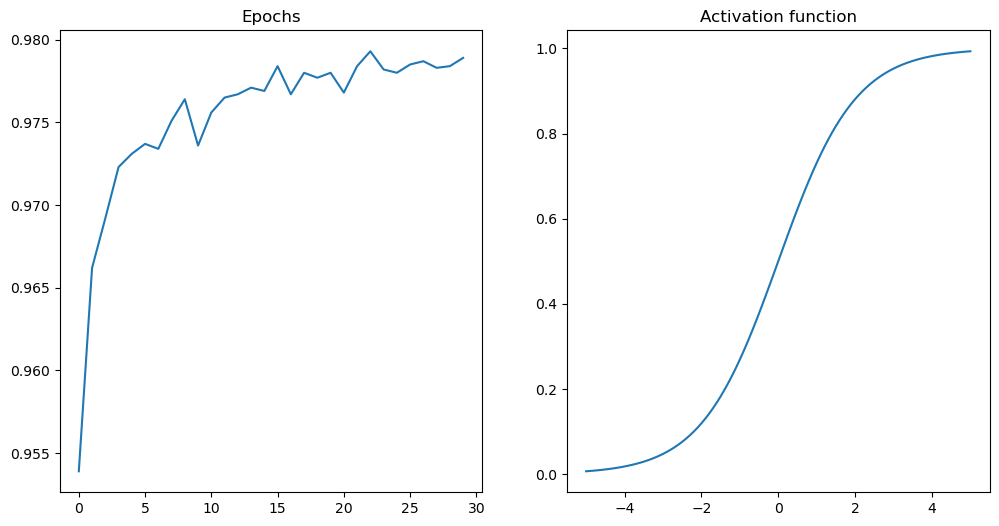

Predicted 9784/10000 correct
Accuracy: 0.9784


In [6]:
from activation_funtions import Sigmoid

activation_function = Sigmoid()
model = NeuralNetwork([784, 100, 10], activation_function=activation_function)
evaluations = model.fit(X_train, y_train, X_val, y_val, 30, 2.0, 10)
plot_result(activation_function, evaluations)
evalulate_model(model)

# ReLU

ReLU on nykyään suositumpi aktivointifunktio kuin Sigmoid. ReLU:ssa on myös heikkouksia, esim. neuronit voivat kuolla. Tämä johtuu siitä, ettei ReLU ole derivoituva nollassa. Kuitenkin pienemällä learning rate arvolla ReLU näyttää päätyvän johonkin minimiin.

Huomasin, jos learning rate on liian iso, neuronit kuolevat. Siis, ReLU:n kanssa käytän pienempää Learnin rate hyperparametriä.

Epoch 0 done -> Predicted 6550/10000
Epoch 1 done -> Predicted 6635/10000
Epoch 2 done -> Predicted 6705/10000
Epoch 3 done -> Predicted 7588/10000
Epoch 4 done -> Predicted 7657/10000
Epoch 5 done -> Predicted 7694/10000
Epoch 6 done -> Predicted 7724/10000
Epoch 7 done -> Predicted 7740/10000
Epoch 8 done -> Predicted 7753/10000
Epoch 9 done -> Predicted 7774/10000
Epoch 10 done -> Predicted 7786/10000
Epoch 11 done -> Predicted 7804/10000
Epoch 12 done -> Predicted 7803/10000
Epoch 13 done -> Predicted 7804/10000
Epoch 14 done -> Predicted 7813/10000
Epoch 15 done -> Predicted 7825/10000
Epoch 16 done -> Predicted 7826/10000
Epoch 17 done -> Predicted 7820/10000
Epoch 18 done -> Predicted 7828/10000
Epoch 19 done -> Predicted 7823/10000
Epoch 20 done -> Predicted 7838/10000
Epoch 21 done -> Predicted 7842/10000
Epoch 22 done -> Predicted 7836/10000
Epoch 23 done -> Predicted 7833/10000
Epoch 24 done -> Predicted 7839/10000
Epoch 25 done -> Predicted 7844/10000
Epoch 26 done -> Predi

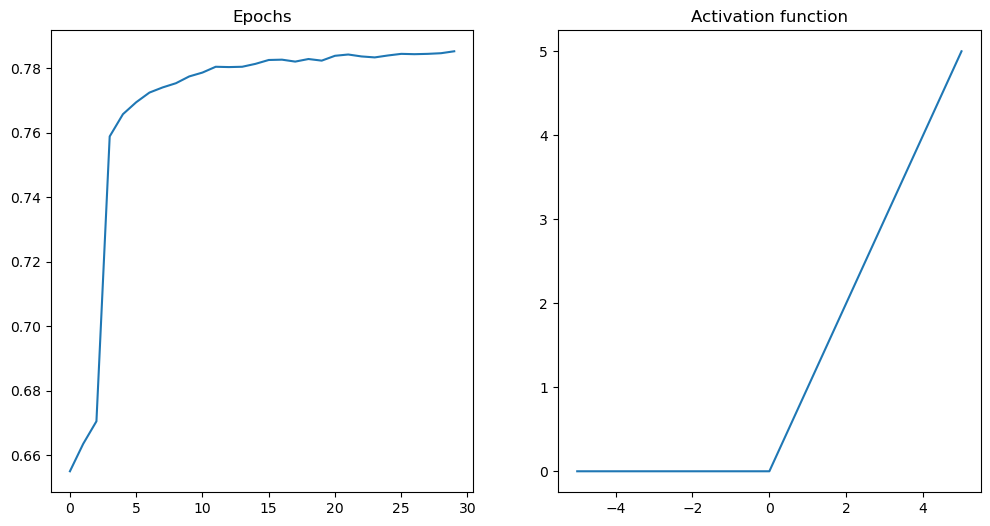

Predicted 7770/10000 correct
Accuracy: 0.777


In [7]:
activation_function = ReLU()
model = NeuralNetwork([784, 30, 16, 10], activation_function=activation_function)
evaluations = model.fit(X_train, y_train, X_val, y_val, 30, 0.01, 10)
plot_result(activation_function, evaluations)

evalulate_model(model)

Epoch 0 done -> Predicted 9099/10000
Epoch 1 done -> Predicted 9250/10000
Epoch 2 done -> Predicted 9348/10000
Epoch 3 done -> Predicted 9423/10000
Epoch 4 done -> Predicted 9471/10000
Epoch 5 done -> Predicted 9492/10000
Epoch 6 done -> Predicted 9514/10000
Epoch 7 done -> Predicted 9541/10000
Epoch 8 done -> Predicted 9545/10000
Epoch 9 done -> Predicted 9580/10000
Epoch 10 done -> Predicted 9587/10000
Epoch 11 done -> Predicted 9590/10000
Epoch 12 done -> Predicted 9594/10000
Epoch 13 done -> Predicted 9599/10000
Epoch 14 done -> Predicted 9607/10000
Epoch 15 done -> Predicted 9602/10000
Epoch 16 done -> Predicted 9602/10000
Epoch 17 done -> Predicted 9616/10000
Epoch 18 done -> Predicted 9622/10000
Epoch 19 done -> Predicted 9623/10000
Epoch 20 done -> Predicted 9617/10000
Epoch 21 done -> Predicted 9633/10000
Epoch 22 done -> Predicted 9624/10000
Epoch 23 done -> Predicted 9624/10000
Epoch 24 done -> Predicted 9625/10000
Epoch 25 done -> Predicted 9628/10000
Epoch 26 done -> Predi

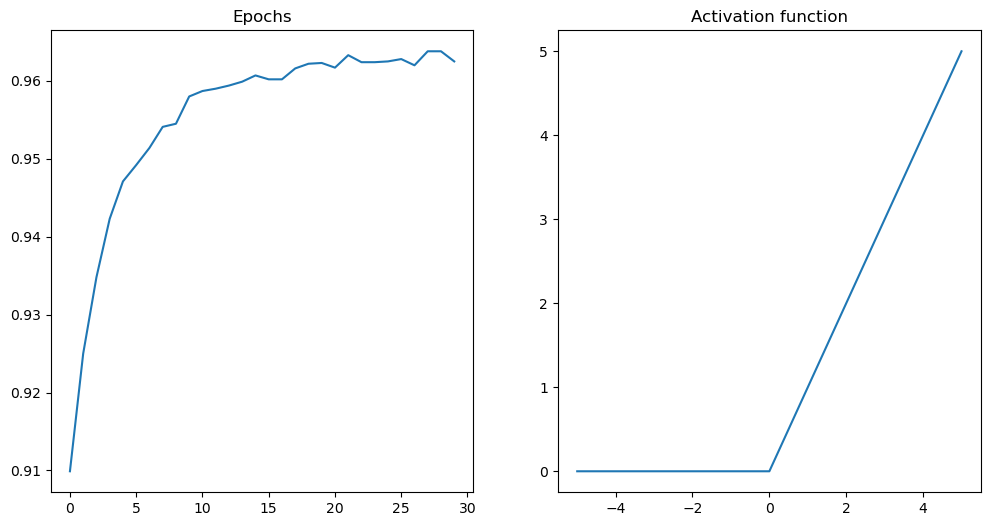

Predicted 9622/10000 correct
Accuracy: 0.9622


In [8]:
activation_function = ReLU()
model = NeuralNetwork([784, 30, 10], activation_function=activation_function)
evaluations = model.fit(X_train, y_train, X_val, y_val, 30, 0.01, 10)
plot_result(activation_function, evaluations)

evalulate_model(model)

Epoch 0 done -> Predicted 8681/10000
Epoch 1 done -> Predicted 9556/10000
Epoch 2 done -> Predicted 9638/10000
Epoch 3 done -> Predicted 9668/10000
Epoch 4 done -> Predicted 9697/10000
Epoch 5 done -> Predicted 9706/10000
Epoch 6 done -> Predicted 9726/10000
Epoch 7 done -> Predicted 9735/10000
Epoch 8 done -> Predicted 9743/10000
Epoch 9 done -> Predicted 9746/10000
Epoch 10 done -> Predicted 9754/10000
Epoch 11 done -> Predicted 9749/10000
Epoch 12 done -> Predicted 9758/10000
Epoch 13 done -> Predicted 9766/10000
Epoch 14 done -> Predicted 9773/10000
Epoch 15 done -> Predicted 9770/10000
Epoch 16 done -> Predicted 9766/10000
Epoch 17 done -> Predicted 9772/10000
Epoch 18 done -> Predicted 9781/10000
Epoch 19 done -> Predicted 9769/10000
Epoch 20 done -> Predicted 9785/10000
Epoch 21 done -> Predicted 9776/10000
Epoch 22 done -> Predicted 9791/10000
Epoch 23 done -> Predicted 9795/10000
Epoch 24 done -> Predicted 9783/10000
Epoch 25 done -> Predicted 9778/10000
Epoch 26 done -> Predi

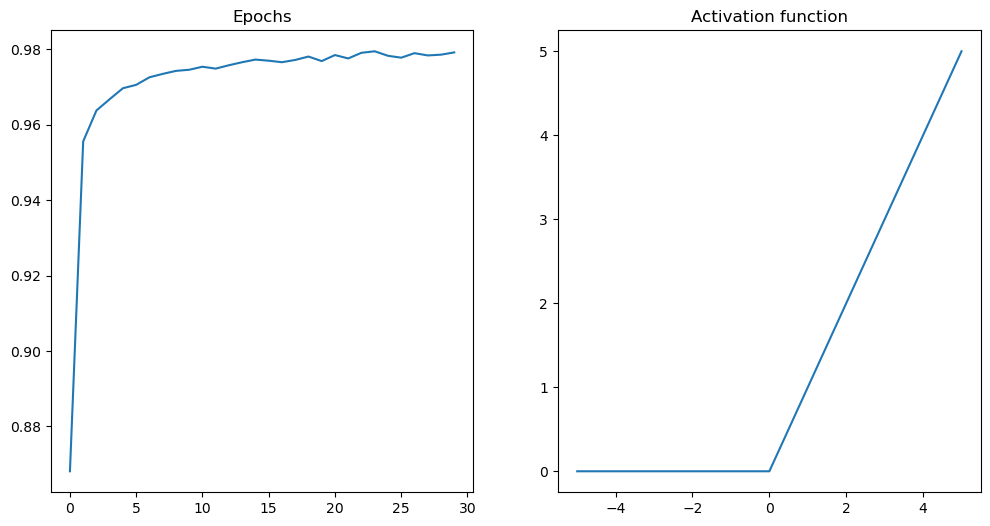

Predicted 9781/10000 correct
Accuracy: 0.9781


In [9]:
from activation_funtions import ReLU

activation_function = ReLU()
model = NeuralNetwork([784, 100, 10], activation_function=activation_function)
evaluations = model.fit(X_train, y_train, X_val, y_val, 30, 0.01, 10)
plot_result(activation_function, evaluations)

evalulate_model(model)

# Leaky ReLU

ReLU variantti, jossa negatiiviset arvot saavat loivan kulmakertoimen nollan sijaan vaikuttaa toimivan paremmin kuin vakio ReLU. Leaky ReLU siis on derivoituva pienillä arvoilla

Epoch 0 done -> Predicted 8949/10000
Epoch 1 done -> Predicted 9184/10000
Epoch 2 done -> Predicted 9305/10000
Epoch 3 done -> Predicted 9391/10000
Epoch 4 done -> Predicted 9441/10000
Epoch 5 done -> Predicted 9479/10000
Epoch 6 done -> Predicted 9514/10000
Epoch 7 done -> Predicted 9529/10000
Epoch 8 done -> Predicted 9545/10000
Epoch 9 done -> Predicted 9568/10000
Epoch 10 done -> Predicted 9575/10000
Epoch 11 done -> Predicted 9592/10000
Epoch 12 done -> Predicted 9593/10000
Epoch 13 done -> Predicted 9603/10000
Epoch 14 done -> Predicted 9607/10000
Epoch 15 done -> Predicted 9622/10000
Epoch 16 done -> Predicted 9603/10000
Epoch 17 done -> Predicted 9621/10000
Epoch 18 done -> Predicted 9629/10000
Epoch 19 done -> Predicted 9631/10000
Epoch 20 done -> Predicted 9634/10000
Epoch 21 done -> Predicted 9626/10000
Epoch 22 done -> Predicted 9637/10000
Epoch 23 done -> Predicted 9634/10000
Epoch 24 done -> Predicted 9648/10000
Epoch 25 done -> Predicted 9652/10000
Epoch 26 done -> Predi

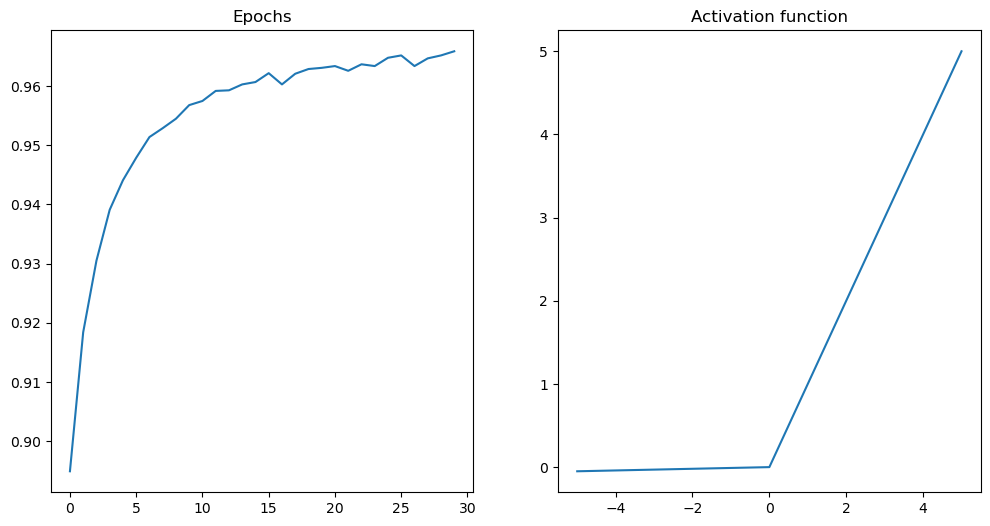

Predicted 9618/10000 correct
Accuracy: 0.9618


In [10]:
from activation_funtions import LeakyReLU

activation_function = LeakyReLU()
model = NeuralNetwork([784, 30, 16, 10], activation_function=activation_function)
evaluations = model.fit(X_train, y_train, X_val, y_val, 30, 0.01, 10)
plot_result(activation_function, evaluations)

evalulate_model(model)

Epoch 0 done -> Predicted 8395/10000
Epoch 1 done -> Predicted 8538/10000
Epoch 2 done -> Predicted 9338/10000
Epoch 3 done -> Predicted 9413/10000
Epoch 4 done -> Predicted 9470/10000
Epoch 5 done -> Predicted 9500/10000
Epoch 6 done -> Predicted 9525/10000
Epoch 7 done -> Predicted 9541/10000
Epoch 8 done -> Predicted 9556/10000
Epoch 9 done -> Predicted 9571/10000
Epoch 10 done -> Predicted 9574/10000
Epoch 11 done -> Predicted 9577/10000
Epoch 12 done -> Predicted 9590/10000
Epoch 13 done -> Predicted 9589/10000
Epoch 14 done -> Predicted 9592/10000
Epoch 15 done -> Predicted 9601/10000
Epoch 16 done -> Predicted 9609/10000
Epoch 17 done -> Predicted 9613/10000
Epoch 18 done -> Predicted 9619/10000
Epoch 19 done -> Predicted 9623/10000
Epoch 20 done -> Predicted 9642/10000
Epoch 21 done -> Predicted 9633/10000
Epoch 22 done -> Predicted 9634/10000
Epoch 23 done -> Predicted 9635/10000
Epoch 24 done -> Predicted 9650/10000
Epoch 25 done -> Predicted 9644/10000
Epoch 26 done -> Predi

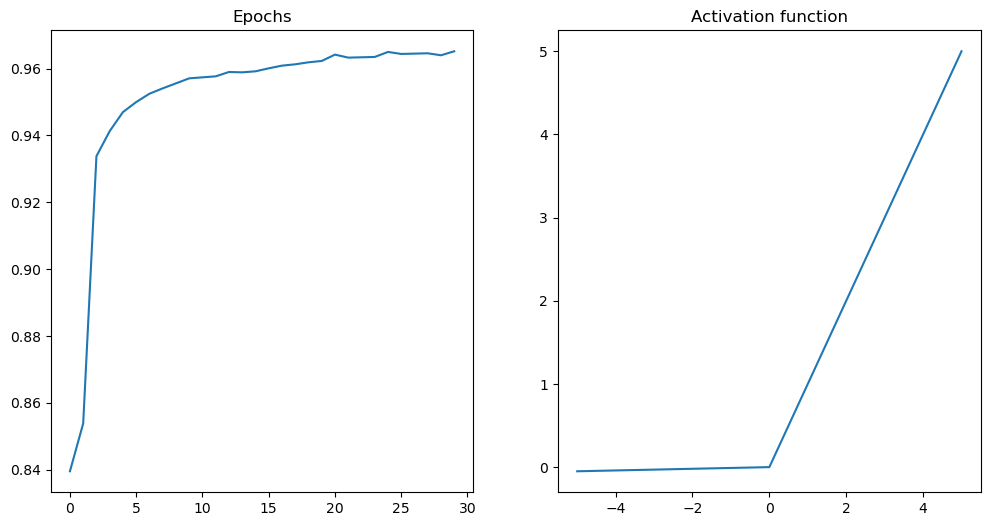

Predicted 9612/10000 correct
Accuracy: 0.9612


In [11]:
activation_function = LeakyReLU()
model = NeuralNetwork([784, 30, 10], activation_function=activation_function)
evaluations = model.fit(X_train, y_train, X_val, y_val, 30, 0.01, 10)
plot_result(activation_function, evaluations)

evalulate_model(model)

Epoch 0 done -> Predicted 9551/10000
Epoch 1 done -> Predicted 9681/10000
Epoch 2 done -> Predicted 9700/10000
Epoch 3 done -> Predicted 9738/10000
Epoch 4 done -> Predicted 9754/10000
Epoch 5 done -> Predicted 9760/10000
Epoch 6 done -> Predicted 9769/10000
Epoch 7 done -> Predicted 9777/10000
Epoch 8 done -> Predicted 9787/10000
Epoch 9 done -> Predicted 9792/10000
Epoch 10 done -> Predicted 9782/10000
Epoch 11 done -> Predicted 9787/10000
Epoch 12 done -> Predicted 9792/10000
Epoch 13 done -> Predicted 9794/10000
Epoch 14 done -> Predicted 9776/10000
Epoch 15 done -> Predicted 9789/10000
Epoch 16 done -> Predicted 9799/10000
Epoch 17 done -> Predicted 9790/10000
Epoch 18 done -> Predicted 9796/10000
Epoch 19 done -> Predicted 9790/10000
Epoch 20 done -> Predicted 9793/10000
Epoch 21 done -> Predicted 9793/10000
Epoch 22 done -> Predicted 9791/10000
Epoch 23 done -> Predicted 9803/10000
Epoch 24 done -> Predicted 9794/10000
Epoch 25 done -> Predicted 9794/10000
Epoch 26 done -> Predi

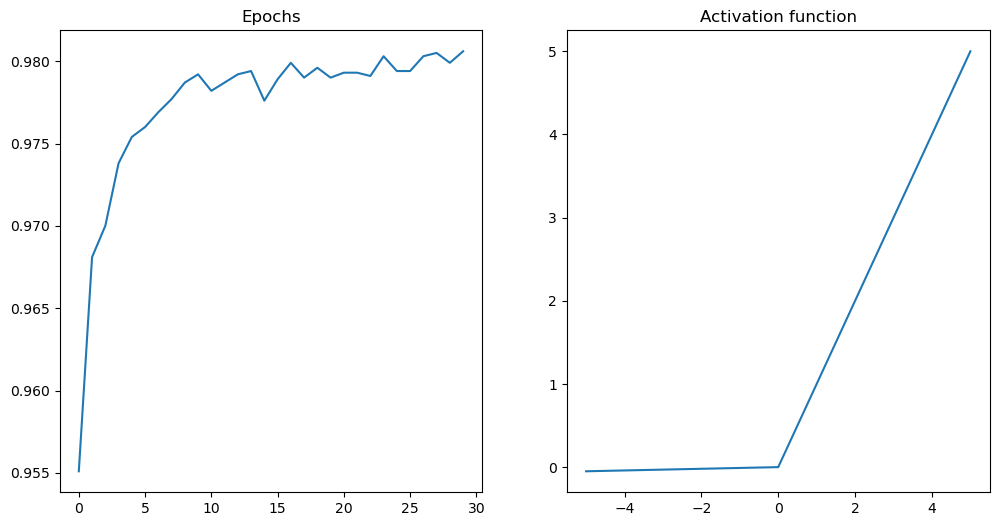

Predicted 9794/10000 correct
Accuracy: 0.9794


In [23]:
activation_function = LeakyReLU()
model = NeuralNetwork([784, 100, 10], activation_function=activation_function)
evaluations = model.fit(X_train, y_train, X_val, y_val, 30, 0.025, 10)
plot_result(activation_function, evaluations)

evalulate_model(model)

best_model = model

# Tanh

Tanh funktion kanssa huomasin, jos learning rate parametri on liian iso, tarkkuus opettamisen aikana pomppii holtittomasti. Tämä tarkoittaa, ettei se löydä minimiä vaan hyppii sen yli.

Epoch 0 done -> Predicted 8832/10000
Epoch 1 done -> Predicted 9044/10000
Epoch 2 done -> Predicted 9125/10000
Epoch 3 done -> Predicted 9183/10000
Epoch 4 done -> Predicted 9226/10000
Epoch 5 done -> Predicted 9258/10000
Epoch 6 done -> Predicted 9285/10000
Epoch 7 done -> Predicted 9309/10000
Epoch 8 done -> Predicted 9335/10000
Epoch 9 done -> Predicted 9341/10000
Epoch 10 done -> Predicted 9361/10000
Epoch 11 done -> Predicted 9373/10000
Epoch 12 done -> Predicted 9398/10000
Epoch 13 done -> Predicted 9402/10000
Epoch 14 done -> Predicted 9420/10000
Epoch 15 done -> Predicted 9419/10000
Epoch 16 done -> Predicted 9429/10000
Epoch 17 done -> Predicted 9437/10000
Epoch 18 done -> Predicted 9442/10000
Epoch 19 done -> Predicted 9450/10000
Epoch 20 done -> Predicted 9467/10000
Epoch 21 done -> Predicted 9467/10000
Epoch 22 done -> Predicted 9464/10000
Epoch 23 done -> Predicted 9478/10000
Epoch 24 done -> Predicted 9465/10000
Epoch 25 done -> Predicted 9478/10000
Epoch 26 done -> Predi

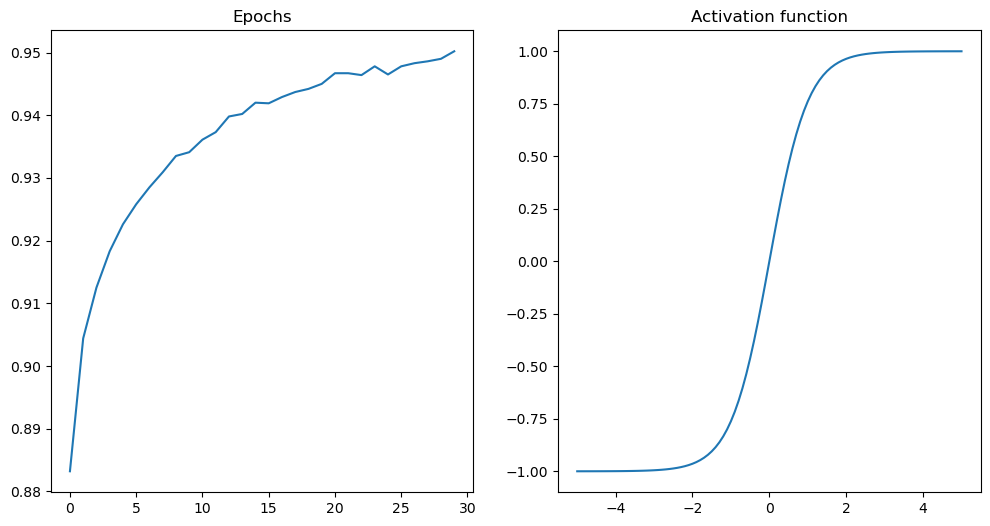

Predicted 9467/10000 correct
Accuracy: 0.9467


In [13]:
from activation_funtions import Tanh

activation_function = Tanh()
model = NeuralNetwork([784, 30, 16, 10], activation_function=activation_function)
evaluations = model.fit(X_train, y_train, X_val, y_val, 30, 0.01, 10)
plot_result(activation_function, evaluations)

evalulate_model(model)

Epoch 0 done -> Predicted 8879/10000
Epoch 1 done -> Predicted 9084/10000
Epoch 2 done -> Predicted 9159/10000
Epoch 3 done -> Predicted 9209/10000
Epoch 4 done -> Predicted 9229/10000
Epoch 5 done -> Predicted 9262/10000
Epoch 6 done -> Predicted 9271/10000
Epoch 7 done -> Predicted 9271/10000
Epoch 8 done -> Predicted 9291/10000
Epoch 9 done -> Predicted 9316/10000
Epoch 10 done -> Predicted 9334/10000
Epoch 11 done -> Predicted 9339/10000
Epoch 12 done -> Predicted 9342/10000
Epoch 13 done -> Predicted 9345/10000
Epoch 14 done -> Predicted 9352/10000
Epoch 15 done -> Predicted 9368/10000
Epoch 16 done -> Predicted 9363/10000
Epoch 17 done -> Predicted 9367/10000
Epoch 18 done -> Predicted 9391/10000
Epoch 19 done -> Predicted 9390/10000
Epoch 20 done -> Predicted 9402/10000
Epoch 21 done -> Predicted 9410/10000
Epoch 22 done -> Predicted 9406/10000
Epoch 23 done -> Predicted 9408/10000
Epoch 24 done -> Predicted 9415/10000
Epoch 25 done -> Predicted 9407/10000
Epoch 26 done -> Predi

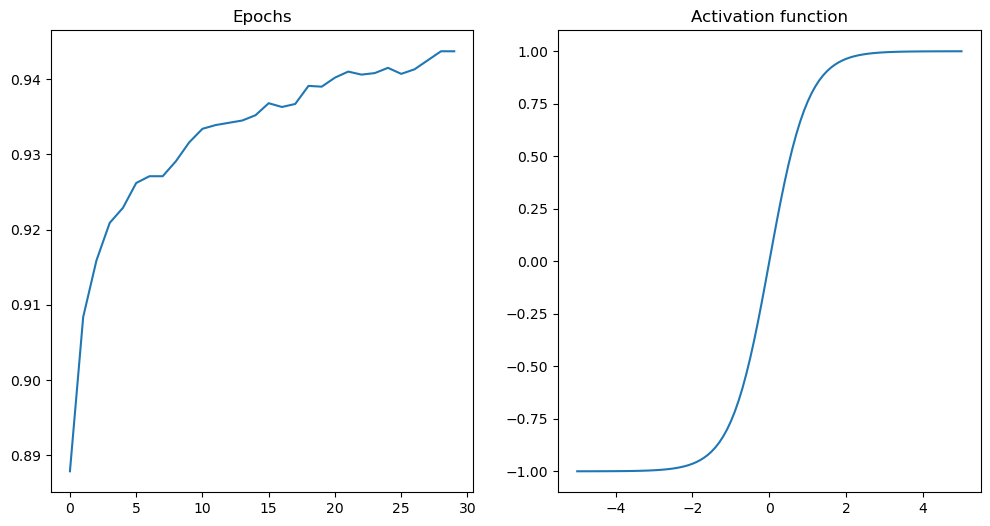

Predicted 9416/10000 correct
Accuracy: 0.9416


In [14]:
activation_function = Tanh()
model = NeuralNetwork([784, 30, 10], activation_function=activation_function)
evaluations = model.fit(X_train, y_train, X_val, y_val, 30, 0.01, 10)
plot_result(activation_function, evaluations)

evalulate_model(model)

Epoch 0 done -> Predicted 8736/10000
Epoch 1 done -> Predicted 9133/10000
Epoch 2 done -> Predicted 9268/10000
Epoch 3 done -> Predicted 9325/10000
Epoch 4 done -> Predicted 9412/10000
Epoch 5 done -> Predicted 9420/10000
Epoch 6 done -> Predicted 9469/10000
Epoch 7 done -> Predicted 9474/10000
Epoch 8 done -> Predicted 9497/10000
Epoch 9 done -> Predicted 9497/10000
Epoch 10 done -> Predicted 9500/10000
Epoch 11 done -> Predicted 9540/10000
Epoch 12 done -> Predicted 9543/10000
Epoch 13 done -> Predicted 9547/10000
Epoch 14 done -> Predicted 9559/10000
Epoch 15 done -> Predicted 9558/10000
Epoch 16 done -> Predicted 9552/10000
Epoch 17 done -> Predicted 9586/10000
Epoch 18 done -> Predicted 9583/10000
Epoch 19 done -> Predicted 9601/10000
Epoch 20 done -> Predicted 9606/10000
Epoch 21 done -> Predicted 9613/10000
Epoch 22 done -> Predicted 9610/10000
Epoch 23 done -> Predicted 9606/10000
Epoch 24 done -> Predicted 9622/10000
Epoch 25 done -> Predicted 9617/10000
Epoch 26 done -> Predi

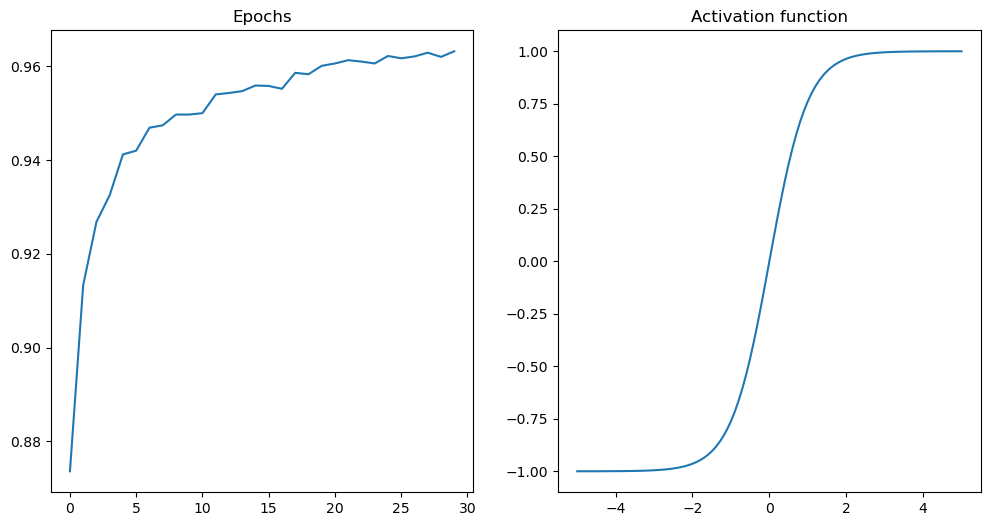

Predicted 9577/10000 correct
Accuracy: 0.9577


In [26]:
activation_function = Tanh()
model = NeuralNetwork([784, 100, 10], activation_function=activation_function)
evaluations = model.fit(X_train, y_train, X_val, y_val, 30, 0.01, 10)
plot_result(activation_function, evaluations)

evalulate_model(model)

Kuitenkin, jos tanh funktiota skaalataan alpha arvolla 0.43, se muistuttaa sigmoid funktiota ja siten käyttäytyy kuten sigmoid. Näin isomalla learning rate parametrillä päätyvän lähellä minimiä, mutta silti hypitään sen yli puolelta toiselle. Kuitenkin, kuten kuvaajasta näkee, Tanh sahaa melkoisesti.

Epoch 0 done
Predicted 9258/10000
Epoch 1 done
Predicted 9283/10000
Epoch 2 done
Predicted 9262/10000
Epoch 3 done
Predicted 9379/10000
Epoch 4 done
Predicted 9372/10000
Epoch 5 done
Predicted 9416/10000
Epoch 6 done
Predicted 9380/10000
Epoch 7 done
Predicted 9391/10000
Epoch 8 done
Predicted 9442/10000
Epoch 9 done
Predicted 9433/10000
Epoch 10 done
Predicted 9344/10000
Epoch 11 done
Predicted 9414/10000
Epoch 12 done
Predicted 9429/10000
Epoch 13 done
Predicted 9423/10000
Epoch 14 done
Predicted 9430/10000
Epoch 15 done
Predicted 9416/10000
Epoch 16 done
Predicted 9459/10000
Epoch 17 done
Predicted 9439/10000
Epoch 18 done
Predicted 9403/10000
Epoch 19 done
Predicted 9449/10000
Epoch 20 done
Predicted 9447/10000
Epoch 21 done
Predicted 9462/10000
Epoch 22 done
Predicted 9422/10000
Epoch 23 done
Predicted 9498/10000
Epoch 24 done
Predicted 9409/10000
Epoch 25 done
Predicted 9445/10000
Epoch 26 done
Predicted 9398/10000
Epoch 27 done
Predicted 9404/10000
Epoch 28 done
Predicted 9382/1

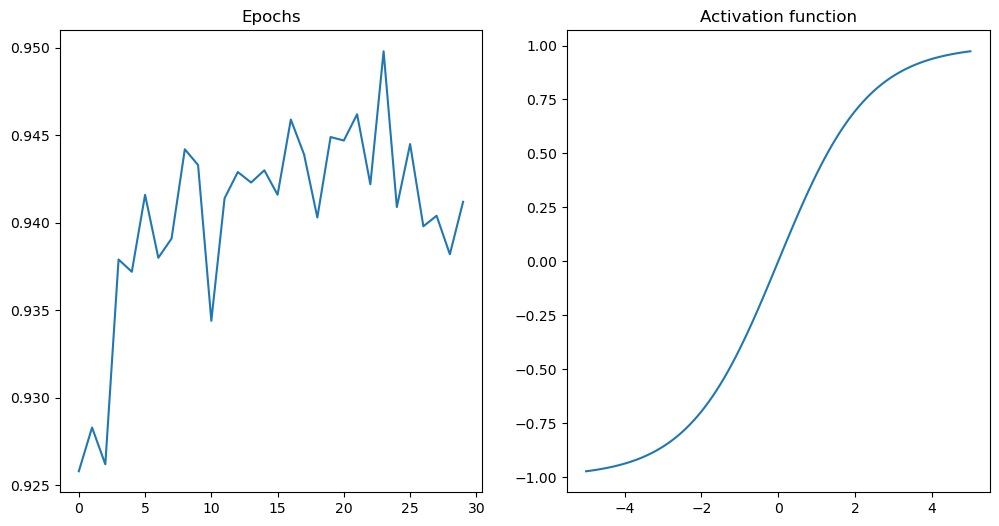

Predicted 9383/10000 correct
Accuracy: 0.9383


In [9]:
activation_function = Tanh(alpha=0.43)
model = NeuralNetwork([784, 30, 10], activation_function=activation_function)
evaluations = model.fit(X_train, y_train, X_val, y_val, 30, 1.0, 10)
plot_result(activation_function, evaluations)

evalulate_model(model)

# Numeroiden visualisointi

Visualisoidaan muutama numero käyttämällä Leaky ReLU 784 100 10 arkkitehtuuria muuttujassa `best_model`.

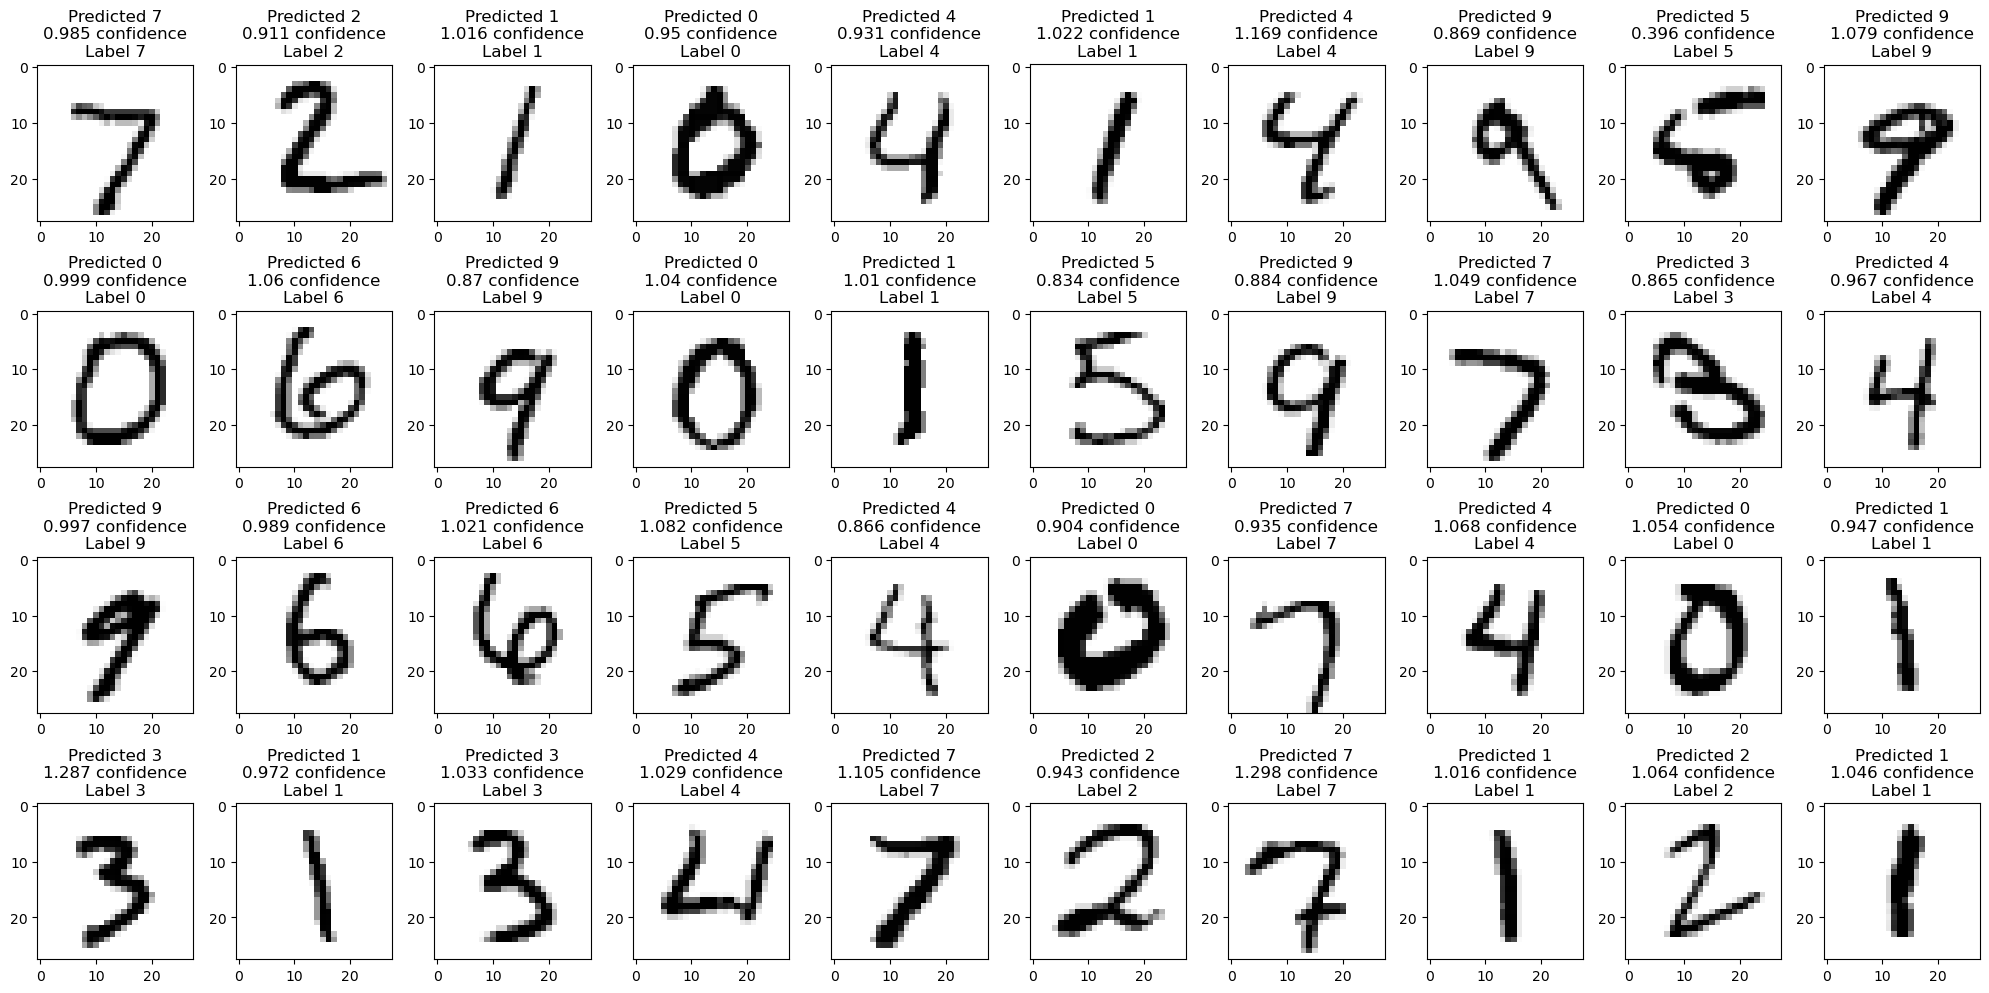

In [24]:
n_prediction = 40
fig, axes = plt.subplots(4, 10, figsize=(20, 10))

def image_vector_to_matrix(v):
    n = int(np.sqrt(v.size))
    return v.reshape(n, n)

for i, ax in enumerate(axes.flatten()):
    ax.imshow(image_vector_to_matrix(X_test[i]), cmap='gray_r')
    prediction, confidence, y = best_model.predict(X_test[i])
    ax.set_title('Predicted {}\n{} confidence\nLabel {}'.format(prediction, confidence, y_test[i]))

plt.tight_layout()
plt.show()

# Johtopäätökset

Parhaat tulokset saatiin kullakin aktivointi funktiolla käyttämällä 784 100 10 arkkitehtuuria.

```
Sigmoid = 0.9784
ReLU = 0.9781
Leaky ReLU = 0.9794
Tanh = 0.9577
```

Huomataa, että Tanh funktio suorituu kaikkein huonoiten. Huomattavaa on, että Sigmoid ja ReLU eivät saa negatiivia arvoja ja Leaky ReLU negatiiviset arvot ovat hyvin lähellä nollaa.

Vaikka Sigmoid, ReLU ja Leaky ReLU:n välillä ei juuri ole merkittävää eroa, Leaky ReLU vaikuttaa oppivan MNIST datasta parhaiten.

Tuloksista huomataan, että neuroverkon arkkitehtuuri vaikuttaa oppimiskykyyn enemmän kuin aktivointifunktion valinta.

Epoch vs tarkkuus -kuvaajista nähdään, että mitä pienempi learning rate, sitä tasaisempi oppimiskäyrä on. ReLU ja Leaky ReLU:n oppivan merkittävästi nopeammin pienemmällä learning rate parametrillä verratuna sigmoidiin.

Leaky ReLU 784 100 100 käytin 0.01 sijaan 0.025 learning rate testakseni sen vaikutusta tarkkuuteen. Neuroveron tarkkuus testisetillä pysyi 3 desimaalin tarkkuudella samalla, mutta epoch vs tarkkuus -kuvaajassa nähdään enemmän sahausta. Päätin jättää 0.025 learning rate opetetun neuroverkon ja kuvaajat tämän tuloksen havainnollistamiseksi.